In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/mpg_dataset.csv")

df.columns

Index(['Unnamed: 0', 'displacement', 'cylinders', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'mpg'],
      dtype='object')

In [3]:
df =df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [5]:
df[df["horsepower"].isna()]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
32,98.0,4,NaN,2046,19.0,71,1,25.0
126,200.0,6,NaN,2875,17.0,74,1,21.0
330,85.0,4,NaN,1835,17.3,80,2,40.9
336,140.0,4,NaN,2905,14.3,80,1,23.6
354,100.0,4,NaN,2320,15.8,81,2,34.5
374,151.0,4,NaN,3035,20.5,82,1,23.0


In [6]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


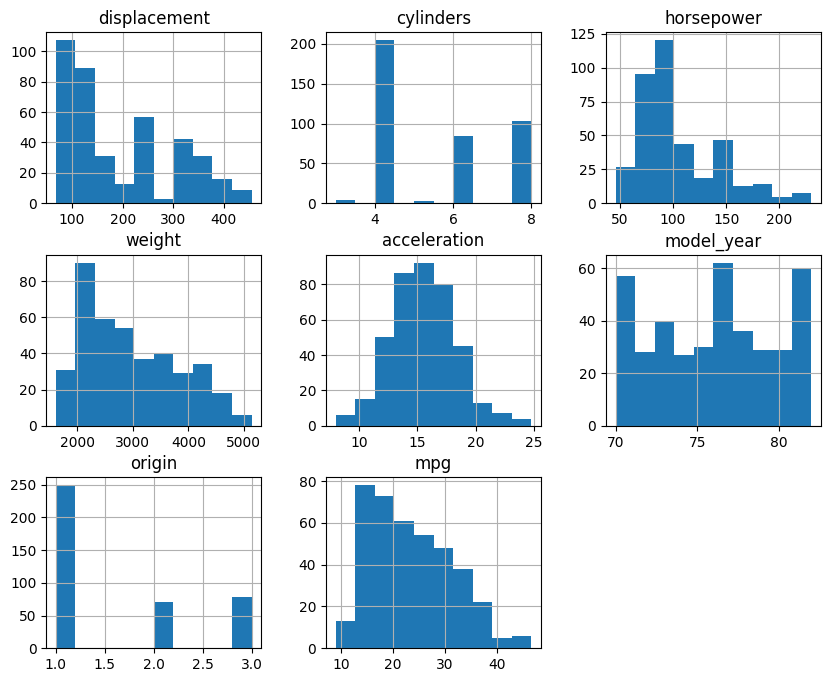

In [7]:
df.hist(figsize=(10, 8))
plt.show()

### Representative Train Test split

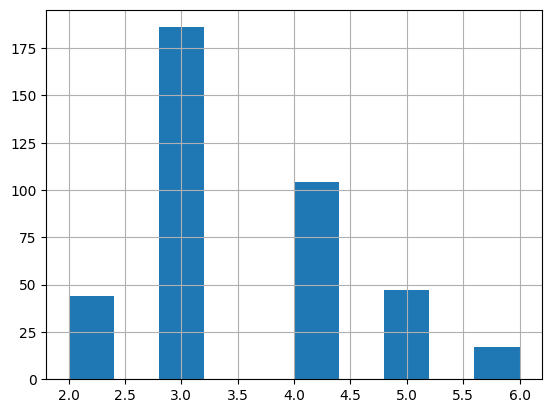

In [8]:
import numpy as np

df["weight_cat"] = pd.cut(
    df["weight"],
    bins=[0, 500, 2000, 3000, 4000, 4500, np.inf],
    labels=[1,2,3,4,5,6]
)

df["weight_cat"].hist()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df, test_size=0.2, stratify=df["weight_cat"], random_state=42)

array([[<Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'origin'}>,
        <Axes: title={'center': 'mpg'}>, <Axes: >]], dtype=object)

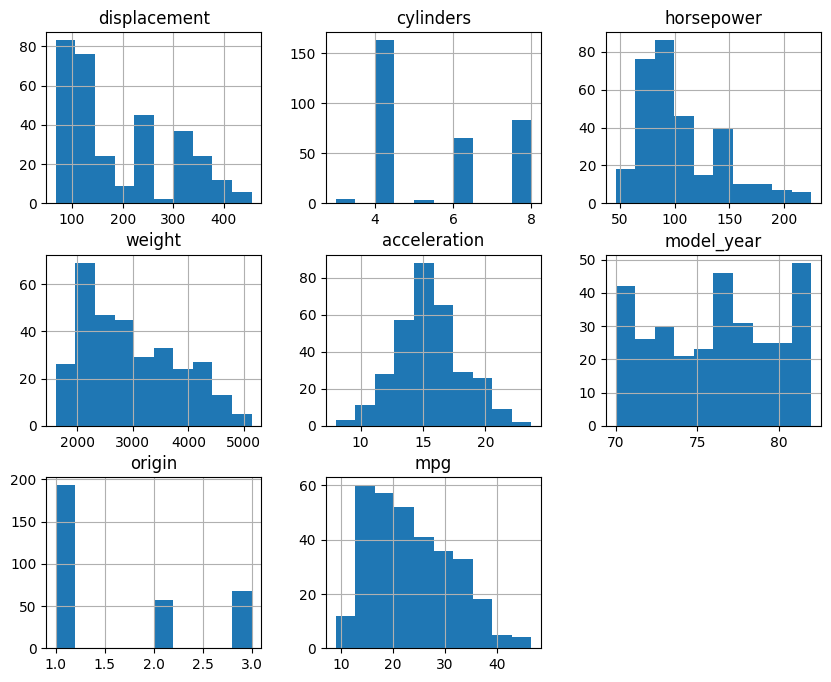

In [21]:
trainset.hist(figsize=(10, 8))

array([[<Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'origin'}>,
        <Axes: title={'center': 'mpg'}>, <Axes: >]], dtype=object)

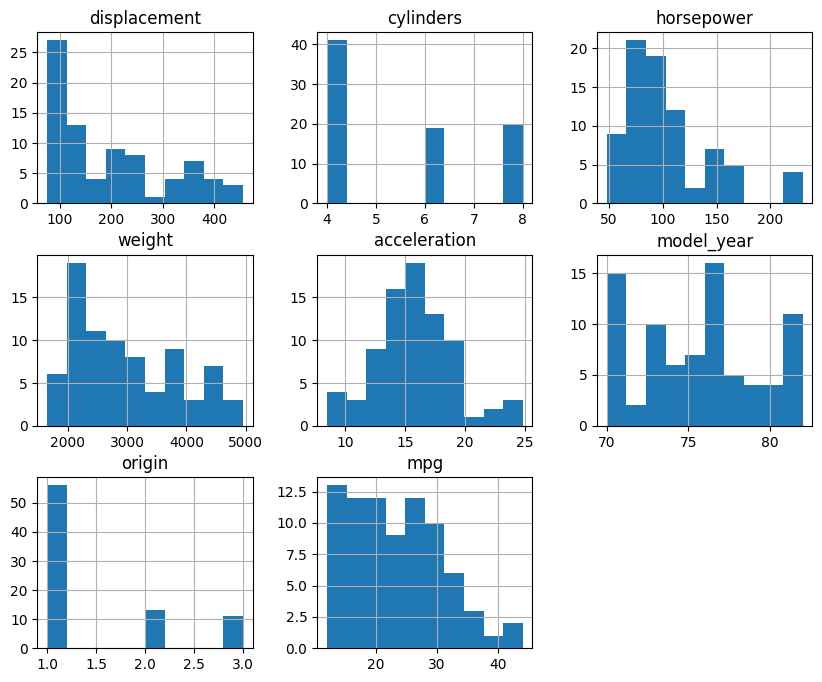

In [22]:
testset.hist(figsize=(10, 8))

In [23]:
autos = trainset.copy()

### Boxplots

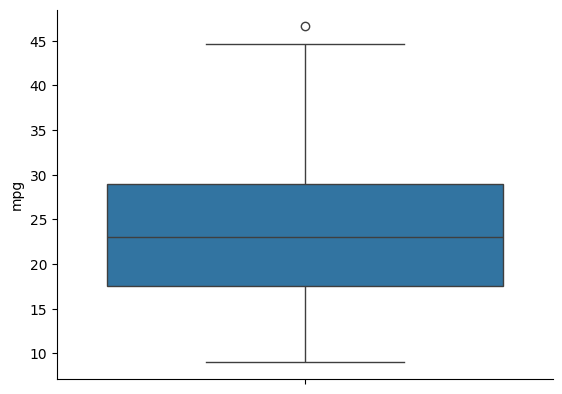

In [40]:
sns.boxplot(data=trainset["mpg"])
sns.despine()

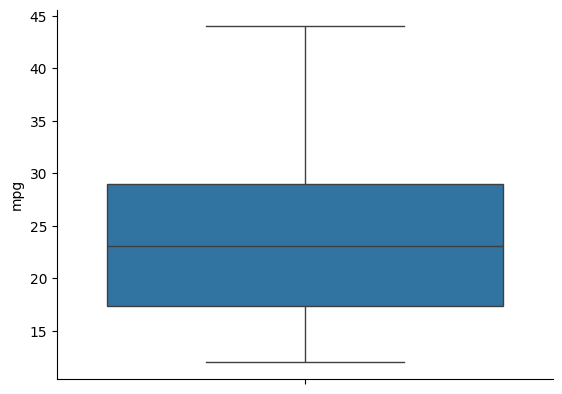

In [41]:
sns.boxplot(data=testset["mpg"])
sns.despine()

## Correlation Analysis

In [24]:
corr_matrix = autos.corr()
corr_matrix["mpg"]

displacement   -0.808615
cylinders      -0.774597
horsepower     -0.787446
weight         -0.834971
acceleration    0.400558
model_year      0.566760
origin          0.584647
mpg             1.000000
weight_cat     -0.764557
Name: mpg, dtype: float64

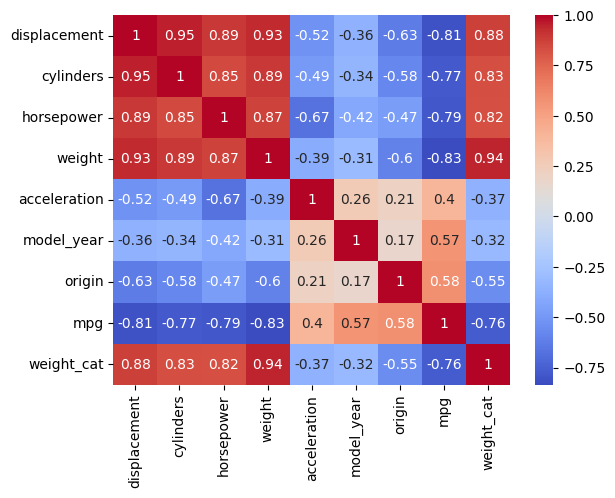

In [25]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

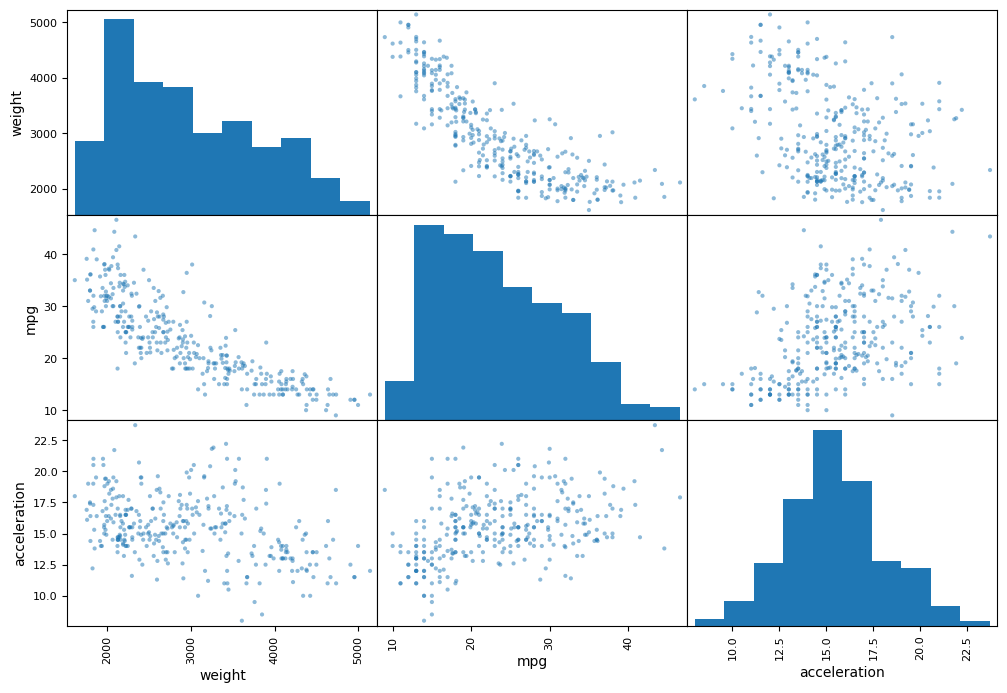

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["weight", "mpg", "acceleration"]
scatter_matrix(autos[attributes], figsize=(12,8))
plt.show()

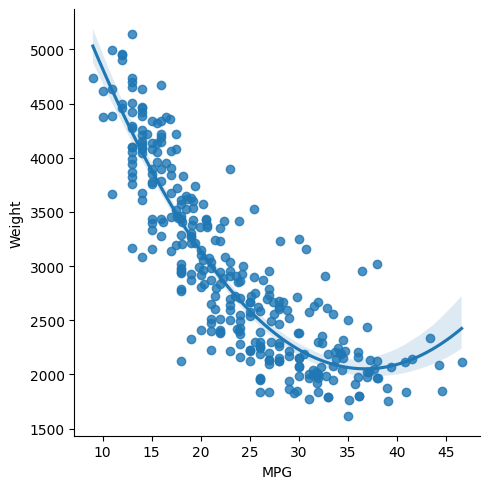

In [27]:
sns.lmplot(data=autos, x="mpg", y="weight", order=2)
plt.xlabel("MPG")
plt.ylabel("Weight")
sns.despine()

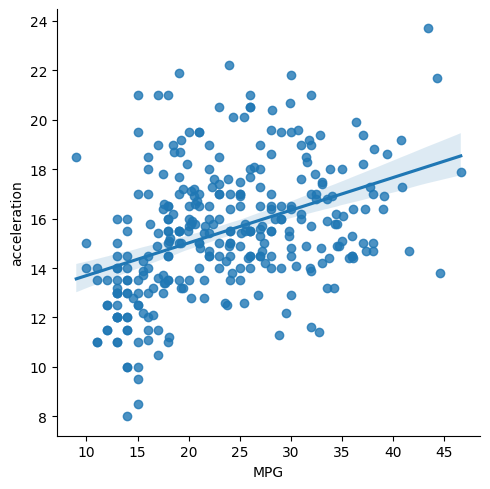

In [28]:
sns.lmplot(data=autos, x="mpg", y="acceleration", order=1)
plt.xlabel("MPG")
plt.ylabel("acceleration")
sns.despine()

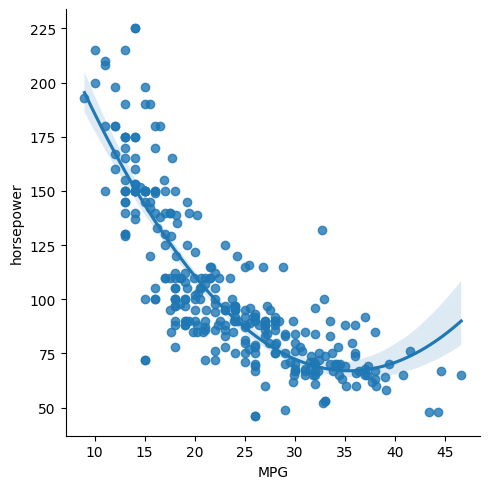

In [29]:
sns.lmplot(data=autos, x="mpg", y="horsepower", order=2)
plt.xlabel("MPG")
plt.ylabel("horsepower")
sns.despine()

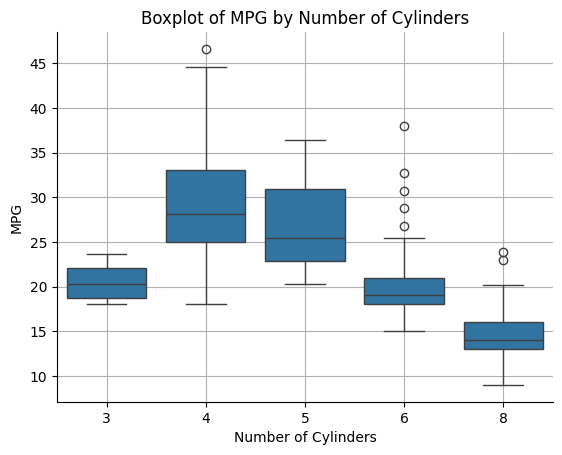

In [30]:
sns.boxplot(x="cylinders", y="mpg", data=autos)
plt.xlabel("Number of Cylinders")
plt.ylabel("MPG")
plt.title("Boxplot of MPG by Number of Cylinders")
plt.grid(visible=True)
sns.despine()

## Performance Metric: RMSE

Also we do not have many outliers for mpg in test set so RMSE is a good metric.

### Baseline Model

As a baseline model for this regression task, we will use the mean value mpg from the training set to predict mpg in the test set. If our model, doesn't do better then this dummy model, we need to rethink our approch.

In [33]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import root_mean_squared_error

model = DummyRegressor(strategy="mean")
model.fit(trainset.drop("mpg", axis=1), trainset["mpg"])

,strategy,'mean'
,constant,None
,quantile,None


In [42]:
y_test_pred = model.predict(testset.drop("mpg", axis=1))
RMSE = root_mean_squared_error(y_true=testset["mpg"], y_pred=y_test_pred)
print(f"RMSE = {RMSE}")

RMSE = 7.4656740652698605
